In [ ]:
using TensorOperations

𝒮 = 1:100
𝒜 = 1:3
𝒪 = 1:100

α = zeros(length(𝒮), length(𝒜))

T = zeros(length(𝒮), length(𝒜), length(𝒮))
R = zeros(length(𝒮), length(𝒜))
O = zeros(length(𝒮), length(𝒜), length(𝒪))

γ = 0.99

R[80] = 10

In [ ]:
for s ∈ 𝒮, a ∈ 𝒜, s′ ∈ 𝒮
    
    if a == 1 && s ≠ 1 & s′ == s-1
        T[s, a, s′] = 1
    elseif a == 2 && s′ == s
        T[s, a, s′] = 1
    elseif a == 3 && s ≠ 100 & s′ == s+1
        T[s, a, s′] = 1
    end

end

In [ ]:
for s′ ∈ 𝒮, a ∈ 𝒜, o ∈ 𝒪
    
    if s′ == 1 && s′ == o
        O[s′, a, o]   = 0.5
        O[s′, a, o+1] = 0.5
    elseif s′ == 100 && s′ == o
        O[s′, a, o]   = 0.5
        O[s′, a, o-1] = 0.5
    elseif s′ == o
        O[s′, a, o+1] = 1/3
        O[s′, a, o]   = 1/3
        O[s′, a, o-1] = 1/3
    end

end

In [ ]:
A = []
push!(A, zeros(length(𝒮), length(𝒜)));
push!(A, R + γ*sum(T[:,:,s′]*sum(O,dims=3)[s′,:,:] for s′ in 𝒮)) #*maximum(A[1],dims=2)[s′] 

In [ ]:
@tensor 

In [ ]:
# #A = R + γ*T* maximum(α, dims=2)

# A′ = maximum(α, dims=2)
# O′ = dropdims(sum(O, dims=3), dims=3)
# AO′ = O′.*A′
# T′  = T*AO′

In [94]:
X = -10:1:10
y = log.(1 .+ abs.(X).^(2 .+ sin.(X)))

μ(X, m)     = [m(x) for x in X]
Σ(X, k)     = [k(x, x′) for x in X, x′ in X]
K(X, X′, k) = [k(x, x′) for x in X, x′ in X′]

K (generic function with 1 method)

In [95]:
zero_mean(x) = 0
squared_exponential_kernel(x, x′, l) = exp(-norm(x - x′)^2/l^2)

squared_exponential_kernel (generic function with 1 method)

In [96]:
se_kernel_1(x, x′) = squared_exponential_kernel(x, x′, 1)

se_kernel_1 (generic function with 1 method)

In [97]:
using Plots; pyplot()

Plots.PyPlotBackend()

In [98]:
mutable struct GaussianProcess
    m 
    k
    X
    y
    ν
end

using LinearAlgebra

In [99]:
function get_predict_functions(X, y, m, k, ν)

    μ̂(x) = μ(x, m)    + K(x, X, k)*(K(X, X, k) + ν*I)^-1*(y - μ(X, m))
    ν̂(x) = K(x, x, k) - K(x, X, k)*(K(X, X, k) + ν*I)^-1*K(X, x, k)
    
    return μ̂, ν̂
    
end

get_predict_functions (generic function with 1 method)

In [103]:
μ̂, ν̂ = get_predict_functions(X, y, zero_mean, (x, x′) -> squared_exponential_kernel(x, x′, 10^0.4), 0)

(μ̂, ν̂)

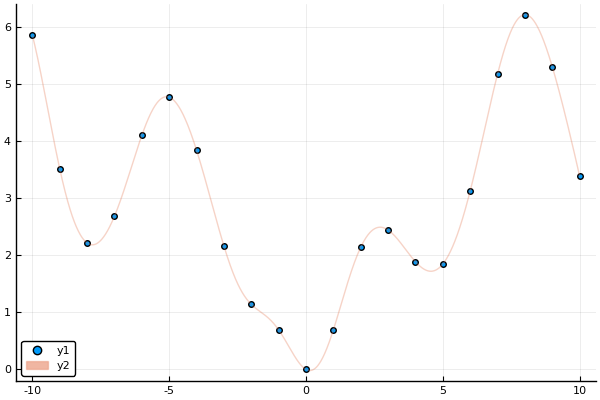

In [104]:
scatter(X, y)
X_plot = -10:0.01:10
plot!(X_plot, μ̂(X_plot), ribbon=diag(ν̂(X_plot)), alpha=0.3)

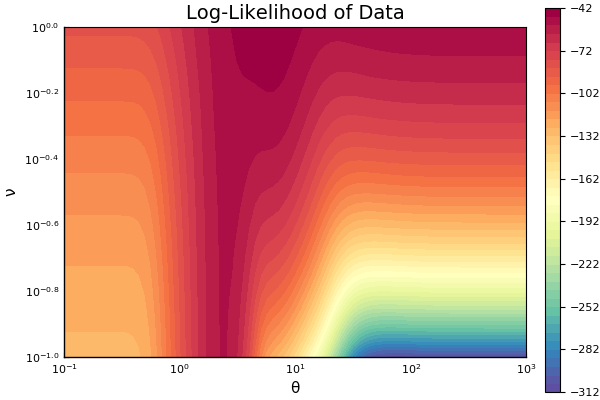

In [102]:
n = size(X)[1]

function ℒ(θ, ν) 
    
    return -n/2*log(π) - 
            1/2*log(det(K(X, X, (x, x′) -> squared_exponential_kernel(x, x′, θ)) + ν*I)) - 
            1/2*(y-μ(X, zero_mean))'*(K(X, X, (x, x′) -> squared_exponential_kernel(x, x′, θ)) + ν*I)^-1*(y-μ(X, zero_mean))
    
end

θs = 10 .^ (-1:0.05:3)
νs = 10 .^ (-1:0.05:0)
contourf(θs, νs, [ℒ(θ, ν) for ν in νs, θ in θs], xscale=:log10, yscale=:log10, box=:on, 
            xlabel="θ", ylabel="ν", levels=50, color=:Spectral_r, title="Log-Likelihood of Data")

In [68]:
θs

31-element Array{Float64,1}:
   0.1
   0.12589254117941673
   0.15848931924611134
   0.19952623149688797
   0.251188643150958
   0.31622776601683794
   0.3981071705534972
   0.5011872336272722
   0.6309573444801932
   0.7943282347242815
   1.0
   1.2589254117941673
   1.5848931924611136
   ⋮
   7.943282347242816
  10.0
  12.589254117941675
  15.848931924611133
  19.952623149688797
  25.118864315095795
  31.622776601683793
  39.810717055349734
  50.11872336272722
  63.09573444801933
  79.43282347242814
 100.0